# Importing Project Dependencies

In [2]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import nltk 
import random
import string

# Create Dataframe

In [13]:
dfObj = pd.DataFrame()

# Defining Variables

In [8]:
comments = []
browser = webdriver.Chrome(chromedriverpath)
airlines = ['aer-lingus', 'air-arabia', 'air-canada', 'air-france', 
           'air-india', 'airasia', 'american-airlines', 
           'cathay-pacific-airways', 'dragonair', 'emirates', 
           'fiji-airways', 'garuda-indonesia', 'goair', 'hop', 
           'hong-kong-airlines', 'iran-air', 'indigo-airlines', 'vistara']

# Scraping all together

Looping over all airlines mentioned above

In [9]:
for data in airlines:
    name = data
    url = "https://www.airlinequality.com/airline-reviews/"+name+"/?sortby=post_date%3ADesc&pagesize=100"
    browser.get(url)
    time.sleep(10)
    comments = browser.find_element(By.XPATH, '/html/body/div[1]/div/div/div/section[3]/div[1]/article').text
    file = open('Airline_'+str(name)+'_data', 'w', newline='', encoding = "UTF-8")
    wr = file.write(comments)
    file.close()

In [10]:
browser.quit()

In [14]:
for data in airlines:
    name = data
    file = open("Airline_"+name+"_data", "r", encoding='UTF-8')
    lines = file.readlines()
    status = []
    comment = []
    n = 0
    for line in lines:
        n = n+1
        if "Verified" in line:
            status.append(line.split("|")[0])
            comment.append(line.split("|")[1])
    dfObj['Status'] = status
    dfObj['Comment'] = comment
    dfObj.to_csv('Output'+name+'.csv',encoding='UTF-8')
    dfObj = pd.DataFrame()
    file.close()

In [52]:
for data in airlines:
    name = data
    df = pd.read_csv('Output'+name+'.csv')

In [53]:
df.head()

,Unnamed: 0,Status,Comment
0,0,✅ Trip Verified,I was flying from Frankfurt to Boston via Dub...
1,1,Not Verified,Lisbon to Seattle via Dublin. It was my first...
2,2,✅ Trip Verified,Paris to Chicago via Dublin. First time trave...
3,3,✅ Trip Verified,Had a good flight from Dublin to Amsterdam an...
4,4,✅ Trip Verified,Glasgow to Toronto via Dublin. Weekend in Tor...


In [59]:
df_copy = df.copy()

In [62]:
df_copy.head()

,Unnamed: 0,Status,Comment
0,0,✅ Trip Verified,I was flying from Frankfurt to Boston via Dub...
1,1,Not Verified,Lisbon to Seattle via Dublin. It was my first...
2,2,✅ Trip Verified,Paris to Chicago via Dublin. First time trave...
3,3,✅ Trip Verified,Had a good flight from Dublin to Amsterdam an...
4,4,✅ Trip Verified,Glasgow to Toronto via Dublin. Weekend in Tor...


In [63]:
reviews = []
for review in df_copy['Comment']:
    review = review.lower()
    reviews.append(review)

In [66]:
df_copy['Comment'] = reviews

In [118]:
df_copy.head()

,Unnamed: 0,Status,Comment
0,0,✅ Trip Verified,i was flying from frankfurt to boston via dub...
1,1,Not Verified,lisbon to seattle via dublin it was my first ...
2,2,✅ Trip Verified,paris to chicago via dublin first time travel...
3,3,✅ Trip Verified,had a good flight from dublin to amsterdam an...
4,4,✅ Trip Verified,glasgow to toronto via dublin weekend in toro...


   # Getting Frequency Distribution of Airline Ratings dataset

In [115]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
for sent in df_copy['Comment']:
    tokenized_word=word_tokenize(sent)
    fdist = FreqDist(tokenized_word)
    print(fdist.most_common(2))

[('the', 23), ('to', 15)]
[('is', 5), ('was', 4)]
[('the', 6), ('i', 3)]
[('to', 5), ('i', 5)]
[('the', 5), ('and', 4)]
[('and', 12), ('the', 11)]
[('was', 4), ('to', 2)]
[('was', 5), ('to', 4)]
[('to', 4), ('the', 4)]
[('to', 4), ('i', 3)]
[('the', 40), ('i', 31)]
[('to', 34), ('the', 29)]
[('to', 25), ('i', 19)]
[('my', 18), ('the', 15)]
[('i', 15), ('and', 14)]
[('my', 15), ('to', 13)]
[('was', 12), ('a', 9)]
[('and', 5), ('to', 2)]
[('to', 5), ('in', 5)]
[('you', 5), ('’', 5)]
[('the', 9), ('was', 6)]
[('to', 10), ('i', 9)]
[('i', 13), ('to', 10)]
[('to', 5), ('and', 5)]
[('and', 3), ('cabin', 3)]
[('the', 20), ('was', 14)]
[('to', 16), ('you', 13)]
[('the', 14), ('to', 13)]
[('the', 11), ('we', 9)]
[('to', 4), ('and', 4)]
[('and', 25), ('the', 21)]
[('to', 5), ('the', 5)]
[('los', 2), ('angeles', 2)]
[('to', 3), ('well', 3)]
[('the', 35), ('and', 17)]
[('the', 6), ('on', 5)]
[('we', 13), ('to', 9)]
[('to', 22), ('at', 11)]
[('to', 9), ('flight', 5)]
[('to', 8), ('we', 6)]
[('the',

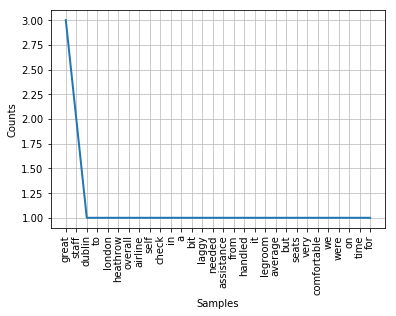

In [117]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()